In [15]:
import numpy as np;
import pandas as pd; 
import matplotlib.pyplot as plt; 
import seaborn as sns;

In [16]:
df = pd.read_csv('customer_data.csv')
df.sample(5)

,Age,EstimatedSalary,Purchased
322,59,70106,0
645,24,108652,1
336,27,146267,1
70,35,77134,0
971,46,56487,0


In [17]:
df.shape

(1200, 3)

In [18]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(1)

In [20]:
df.sample(5)

,Age,EstimatedSalary,Purchased
657,28,147118,1
366,49,132992,0
1115,52,70115,0
249,39,148583,0
790,23,138402,1


In [21]:
df.describe()

,Age,EstimatedSalary,Purchased
count,1200.000000,1200.000000,1200.000000
mean,39.990000,85924.469167,0.526667
std,11.719258,37951.352287,0.499497
min,20.000000,20060.000000,0.000000
25%,30.000000,52520.250000,0.000000
50%,41.000000,86071.000000,1.000000
75%,50.000000,119596.500000,1.000000
max,59.000000,149972.000000,1.000000


In [22]:
df.sample(5)

,Age,EstimatedSalary,Purchased
1199,30,108920,0
360,51,144165,0
310,50,85160,1
751,49,92541,1
698,34,76446,1


In [24]:
# Train Test Split.......................................................
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'], 
                                                    test_size=0.3,
                                                     random_state=0) 
x_train.shape, x_test.shape

((840, 2), (360, 2))

In [27]:
# StandardScaler..............................
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaler.fit(x_train)  # for training the set or learn the parameter

x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)  

In [28]:
scaler.mean_

array([4.0197619e+01, 8.7002856e+04])

In [33]:
x_train_scaler = pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test_scaler = pd.DataFrame(y_test_scaler, columns=x_test.columns)

In [38]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,840.0,840.0
mean,40.2,87002.9
std,11.7,37850.5
min,20.0,20060.0
25%,30.0,53888.8
50%,41.0,87662.0
75%,51.0,120734.8
max,59.0,149972.0


In [39]:
np.round(x_train_scaler.describe(), 1)

,Age,EstimatedSalary
count,840.0,840.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.7,-1.8
25%,-0.9,-0.9
50%,0.1,0.0
75%,0.9,0.9
max,1.6,1.7


In [40]:
# Effect of Scaling.........................................

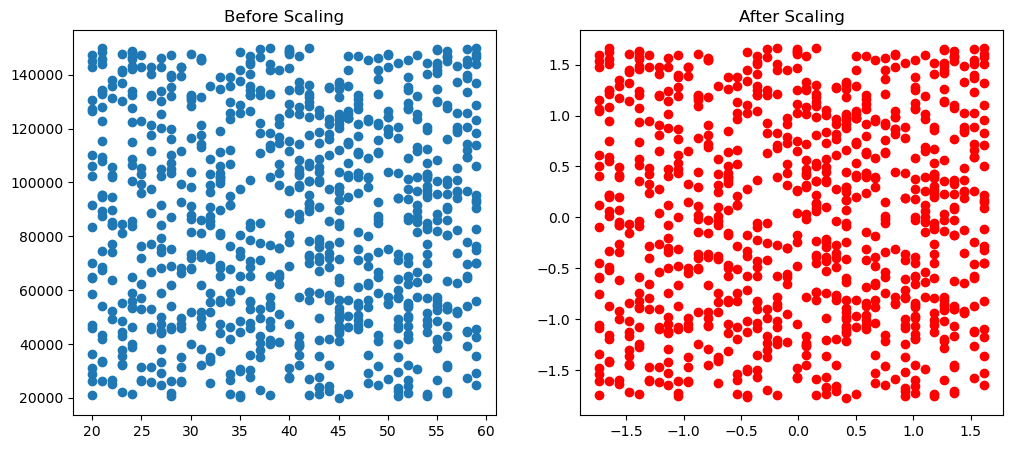

In [41]:
fig, (a, b) = plt.subplots(ncols=2, figsize=(12, 5))
a.scatter(x_train['Age'], x_train['EstimatedSalary'])
a.set_title('Before Scaling')
b.scatter(x_train_scaler['Age'], x_train_scaler['EstimatedSalary'], color='red')
b.set_title('After Scaling')
plt.show()

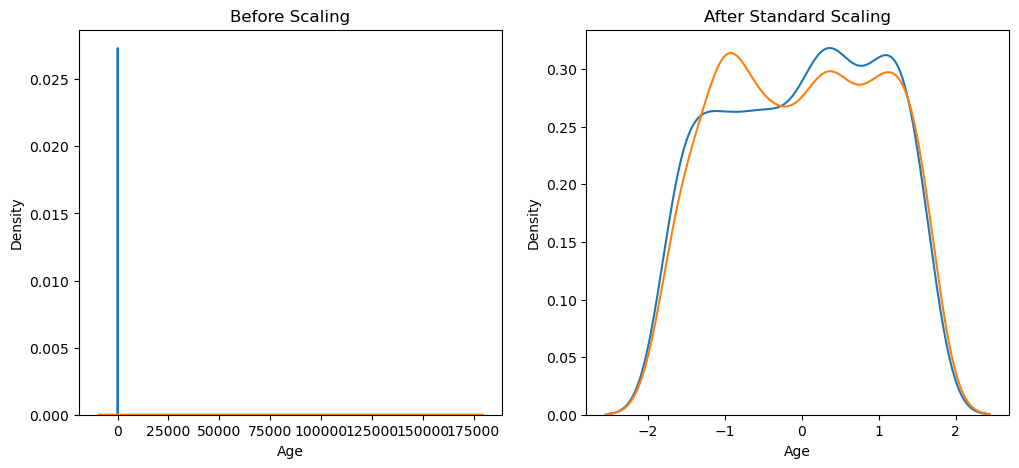

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaler['Age'], ax=ax2)
sns.kdeplot(x_train_scaler['EstimatedSalary'], ax=ax2)

plt.show()
